# **Predicting House Rent in Dhaka**
### Using Python, Pandas & PyTorch

Dhaka is one of the most populated megacities of the world. It is the capital of Bangladesh, a country of 164.7m population in the South-East Asian sub-continent. Dhaka is inhabited by over 20 million people, with 75-80% people living in rented houses. The rent hike in the city was recorded 29% in the last five years. Nearly 65 percent or more of the city dwellers' monthly income is spent on paying the rent.

However, house rent vary depending on various factors. We have tried to build a Machine Learning model, using Artificial Neural Network (ANN) in PyTorch, to predict house rent in Dhaka.

The dataset used in this project to train and test the model is webscrapped from [bproperties.com](https://www.bproperty.com)



### Data Collection

We have scrapped the `location`, `Area in sqft`, `No of Bedrooms`, `Number of Bathrooms` and `Monthly Rent` from the following website:
[https://www.bproperty.com/en/dhaka/apartments-for-rent/?load_all_prop=1](https://www.bproperty.com/en/dhaka/apartments-for-rent/?load_all_prop=1)

<b>Tool:</b>
1. [Google Colab](https://colab.research.google.com)

Script can be found here:
[https://github.com/taeefnajib/Predicting-House-Rent-in-Dhaka/blob/main/Scraping_House_Rents_in_Dhaka.ipynb](https://github.com/taeefnajib/Predicting-House-Rent-in-Dhaka/blob/main/Scraping_House_Rents_in_Dhaka.ipynb)

<b>Feature Variables:</b>
1. Location
2. Area
3. No of Bed
4. No of Bath

<b>Target Variable:</b>
1. Rent

There are 4,13,782 Apartments in Dhaka that are listed on the website, from which we have taken 28,800 apartments.

<b>Dependencies:</b>
* Selenium
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Scikit Learn

We have installed all the dependencies using [Pip](https://pip.pypa.io/en/stable/)

After collecting all the data and saving to a dataframe, we have exported the data into the csv file "houserentdhaka.csv" using the following code:

```
from google.colab import files
df.to_csv('houserentdhaka.csv', encoding = 'utf-8-sig')
files.download('houserentdhaka.csv')
```

The file can be found here:
[houserentdhaka.csv](https://github.com/taeefnajib/Predicting-House-Rent-in-Dhaka/blob/main/houserentdhaka.csv)

In [1]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/taeefnajib/Predicting-House-Rent-in-Dhaka/main/houserentdhaka.csv")

In [3]:
df.head()

,Unnamed: 0,Location,Area,Bed,Bath,Price
0,0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand


In [4]:
df.shape

(28800, 6)

### Data Pre-processing
In this step, we are going to perform the following actions for data wrangling:

* Check for column names
* Treating unnecessary columns
* Checking for missing values and treating them
* Formating data and changing datatypes
* One-hot Encoding: Preparing categorical values for Machine Learning (LATER)

In [5]:
#Check for column names
df.columns

Index(['Unnamed: 0', 'Location', 'Area', 'Bed', 'Bath', 'Price'], dtype='object')

*Note: As we can see, the column for Rent is named as Price, which is a mistake. We are going to fix this.*

In [6]:
df = df.rename({'Price': 'Rent'}, axis=1)

In [7]:
df.head(3)

,Unnamed: 0,Location,Area,Bed,Bath,Rent
0,0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand


*Note: There is an unnecessary column called Unnamed: 0. We are going to remove that*

In [8]:
#Treating unnecessary columns
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [9]:
df.head(3)

,Location,Area,Bed,Bath,Rent
0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand


In [10]:
#Checking for missing values
df.isnull().sum()

Location    0
Area        0
Bed         0
Bath        0
Rent        0
dtype: int64

There is no null value in the dataframe

In [11]:
#Formating data and changing datatypes
#Checking for datatypes
df.dtypes

Location    object
Area        object
Bed          int64
Bath         int64
Rent        object
dtype: object

There are a few things we need to format in the dataframe:
1. We need to remove the city name from the Location column
2. We need to remove sqft from the Area column and remove comma "," from the digits
3. We need to change the datatype of the Area column to int64 from object
4. We need to turn any string in the Rent column to its neumeric form. For this, we need to turn 65 Thousand into 65000 and 1.5 Lakh into 150000
5. We need to also change the datatype of the Rent column to float from object

In [12]:
#Removing city names from the Location column
df['Location']=df['Location'].str.split(',').str[:-1]

In [13]:
df.head()

,Location,Area,Bed,Bath,Rent
0,"[Block H, Bashundhara R-A]","1,600 sqft",3,3,20 Thousand
1,"[Farmgate, Tejgaon]",900 sqft,2,2,20 Thousand
2,"[Block B, Nobodoy Housing Society, Mohammadpur]","1,250 sqft",3,3,18 Thousand
3,"[Gulshan 1, Gulshan]","2,200 sqft",3,4,75 Thousand
4,[Baridhara],"2,200 sqft",3,3,75 Thousand


In [14]:
#Keeping only the thana/PO/area name in the Location column
df['Location'] = df['Location'].str[-1]

In [15]:
#Removing the leading space from the Location strings
df['Location'] = df['Location'].str.strip()

In [16]:
df.head()

,Location,Area,Bed,Bath,Rent
0,Bashundhara R-A,"1,600 sqft",3,3,20 Thousand
1,Tejgaon,900 sqft,2,2,20 Thousand
2,Mohammadpur,"1,250 sqft",3,3,18 Thousand
3,Gulshan,"2,200 sqft",3,4,75 Thousand
4,Baridhara,"2,200 sqft",3,3,75 Thousand


In [17]:
#Removing sqft from the Area column and formating the digits
df['Area']=df['Area'].str.split(' ').str[:-1]

In [18]:
#Truning data in the location column into string from list type
df['Area'] = df['Area'].apply(lambda x: ''.join(map(str, x)))

In [19]:
#Removing comma from the digits
df['Area']=df['Area'].str.replace(',', '')

In [20]:
#Changing datatype of the Area column to int64 from object
df['Area'] = df['Area'].astype(int)

In [21]:
df['Area'].dtypes

dtype('int64')

In [22]:
df.head(3)

,Location,Area,Bed,Bath,Rent
0,Bashundhara R-A,1600,3,3,20 Thousand
1,Tejgaon,900,2,2,20 Thousand
2,Mohammadpur,1250,3,3,18 Thousand


In [23]:
#Formatting the Rent column as required and changing the datatype to int64
df['Rent']=df['Rent'].replace({"Thousand":"*1e3", "Lakh":"*1e5"}, regex=True).map(pd.eval).astype(int)

In [24]:
df.head(3)

,Location,Area,Bed,Bath,Rent
0,Bashundhara R-A,1600,3,3,20000
1,Tejgaon,900,2,2,20000
2,Mohammadpur,1250,3,3,18000


### **Exploratory Data Analysis (EDA)**
In this step, we are going to perform the following steps:

* Summarize quantitative data by describe()
* Summarize categorical data by value_counts()
* Visualize numeric data with box plot
* Visualize relationship between a feature and the target using scatter plot
* Use correlation to show relationship between two variables
* Show correlation using Pearson Correlation
* Visualize correlation with a heatmap
* Use Chi-square to show the association/relationship between two categorical variables. It tests how likely it is that an observed distribution is due to chance


In [25]:
#Summarizing quantitative data
df.describe()

,Area,Bed,Bath,Rent
count,28800.000000,28800.000000,28800.000000,28800.000000
mean,1057.332049,2.511076,2.369653,21008.717153
std,477.821030,0.601353,0.756758,21495.755843
min,200.000000,1.000000,1.000000,5000.000000
25%,700.000000,2.000000,2.000000,13000.000000
50%,900.000000,2.000000,2.000000,16000.000000
75%,1250.000000,3.000000,3.000000,22000.000000
max,6300.000000,6.000000,8.000000,650000.000000


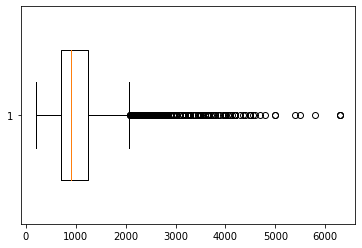

In [26]:
#Visualizing quantitative data with boxplot
plt.boxplot(df["Area"], vert=False, widths = 0.6)
plt.show()

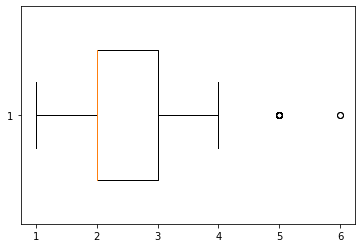

In [27]:
#Visualizing quantitative data with boxplot
plt.boxplot(df["Bed"], vert=False, widths = 0.6)
plt.show()

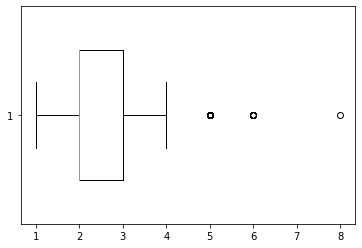

In [28]:
#Visualizing quantitative data with boxplot
plt.boxplot(df["Bath"], vert=False, widths = 0.6)
plt.show()

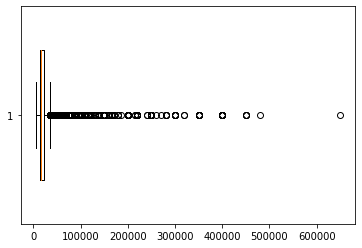

In [29]:
#Visualizing quantitative data with boxplot
plt.boxplot(df["Rent"], vert=False, widths = 0.6)
plt.show()

In [30]:
#Summarizing categorical data [Location]
df["Location"].value_counts()

Mirpur             8451
Mohammadpur        3612
Uttara             2070
Badda              1831
Bashundhara R-A    1397
                   ... 
Shahbagh              7
Demra                 7
Keraniganj            3
Sadarghat             2
Banglamotors          2
Name: Location, Length: 68, dtype: int64

In [31]:
#Summarizing categorical data [Bed]
df["Bed"].value_counts()

2    14277
3    12972
4     1064
1      461
5       24
6        2
Name: Bed, dtype: int64

In [32]:
#Summarizing categorical data [Bath]
df["Bath"].value_counts()

2    15768
3     8468
1     2369
4     2048
5      139
6        7
8        1
Name: Bath, dtype: int64

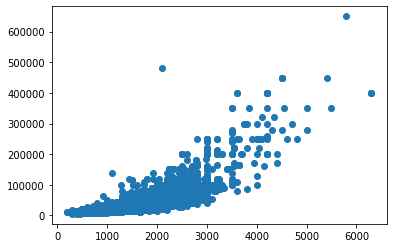

In [33]:
#Relationship between Area and Rent
plt.scatter(df["Area"], df["Rent"])
plt.show()

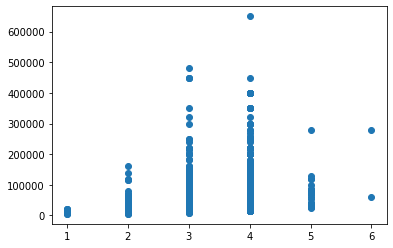

In [34]:
#Relationship between Bed and Rent
plt.scatter(df["Bed"], df["Rent"])
plt.show()

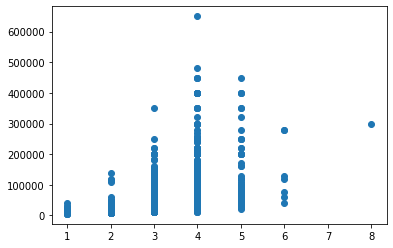

In [35]:
#Relationship between Bath and Rent
plt.scatter(df["Bath"], df["Rent"])
plt.show()

In [36]:
#Pearson's Correlation
pearson = df.corr(method ='pearson')
pearson

,Area,Bed,Bath,Rent
Area,1.000000,0.774598,0.808130,0.747625
Bed,0.774598,1.000000,0.759135,0.426759
Bath,0.808130,0.759135,1.000000,0.481448
Rent,0.747625,0.426759,0.481448,1.000000


Text(0.5, 1.0, 'Pearson Correlation')

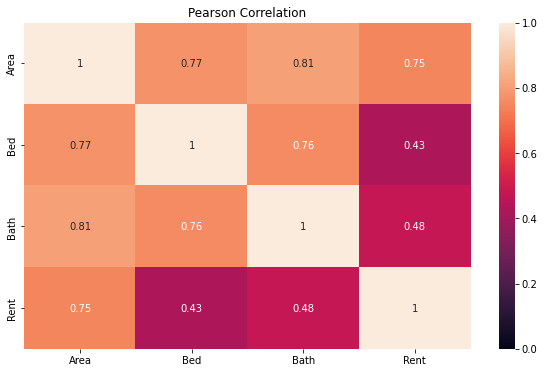

In [37]:
#Creating heatmap
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(pearson, vmin=0,vmax=1, annot=True)
plt.title("Pearson Correlation")

As it is observed, Area has the highest impact on Rent (0.75). No. of bedrooms and no. of bathrooms have too little to do with the rent of the houses (0.43 and 0.48, consecutively).

#### Question 1: Which location has the highest average rent? Show top 5 locations.

In [38]:
df.groupby(['Location'])['Rent'].mean().sort_values(ascending=False).nlargest(5)

Location
Baridhara         141273.621891
Gulshan           125727.937500
Banani DOHS        98318.181818
Mohakhali DOHS     89727.272727
Banani             81178.564286
Name: Rent, dtype: float64

#### Question 2: Which location has the lowest average rent? Show bottom 5 locations.

In [39]:
df.groupby(['Location'])['Rent'].mean().sort_values(ascending=True).nsmallest(5)

Location
Demra           11642.857143
Shyampur        11888.888889
Khilkhet        12058.064516
Dakshin Khan    12060.861423
Uttar Khan      12411.764706
Name: Rent, dtype: float64

#### Question 3: Which location has the largest houses on average?

In [40]:
df.groupby(['Location'])['Area'].mean().sort_values(ascending=False).nlargest(5)

Location
Gulshan           2692.720588
Baridhara         2604.925373
Banani DOHS       2466.727273
Mohakhali DOHS    2350.000000
Banani            2295.500000
Name: Area, dtype: float64

#### Question 4: Which location has the smallest houses on average?

In [41]:
df.groupby(['Location'])['Area'].mean().sort_values(ascending=True).nsmallest(5)

Location
Sadarghat       675.000000
Kotwali         686.363636
Mohakhali       687.142857
Shahjahanpur    725.254237
Bangshal        726.000000
Name: Area, dtype: float64

#### Question 5: What is the average house rent in Dhaka?

In [42]:
print("Average Rent in Dhaka:", df['Rent'].mean())

Average Rent in Dhaka: 21008.71715277778


#### Question 6: What is the average house size (in sqft) in Dhaka?

In [43]:
print("Average Size of Houses in Dhaka:", round(df['Area'].mean()))

Average Size of Houses in Dhaka: 1057


#**Model Building**
In this step, we are going to build a model to predict house rent, given feature variables like location, area, no of bed rooms and no of bathrooms. We are going to use Artificial Neural Network (ANN) to predict the house rent.

##**ANN-Artificial Neural Network**

Artificial neural networks, usually simply called neural networks, are computing systems inspired by the biological neural networks that constitute animal brains. An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain.

##**Linear Regression Using PyTorch**

We're going to use PyTorch to perform Linear Regression. PyTorch is an optimized tensor library for deep learning using GPUs and CPUs. An official documentation of PyTorch library can be found here:

[https://pytorch.org/docs/stable/index.html](https://pytorch.org/docs/stable/index.html)


###Steps We're Going to Take
- Import all dependencies
- Get the dataset
- Build a model
- Define loss funtion and optimizer
- Define trainer
- Define test (on validation)
- Run trainer and test

###**Import All Dependencies**

In [44]:
###Import All Dependencies
import torch
from torch.utils.data import DataLoader, TensorDataset
from torchvision.transforms import ToTensor
from torch import nn, optim
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

In [45]:
# set default device based on CUDA's availability
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

###**Get The Dataset**

In [46]:
X = df.drop(['Rent'], axis = 1)

In [47]:
y = df['Rent']

In [48]:
y = y.values.reshape(-1, 1)

##**Handling the Categorical Values using `get_dummies()`**

In [49]:
X_cat = pd.get_dummies(X.Location, prefix='Location')
X = X.join(X_cat)
X = X.drop(['Location'], axis=1)

###**Splitting the Dataset into Train, Validation and Test Datasets**

In [50]:
#Splitting into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Converting the pandas dataframes into PyTorch Tensors
# From here onwards our features are inputs and labels are targets
inputs = torch.tensor(X_train.values).float()
targets = torch.tensor(y_train).float()
print(inputs)
print(targets)

tensor([[1.4000e+03, 3.0000e+00, 3.0000e+00,  ..., 0.0000e+00, 1.0000e+00,
         0.0000e+00],
        [9.0000e+02, 2.0000e+00, 2.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.7500e+03, 3.0000e+00, 4.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [3.5150e+03, 4.0000e+00, 4.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.0000e+03, 3.0000e+00, 2.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [8.5000e+02, 2.0000e+00, 2.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])
tensor([[ 28000.],
        [ 25000.],
        [ 30000.],
        ...,
        [270000.],
        [ 15000.],
        [ 12500.]])


In [52]:
# Shape of inputs and targets
print(f"Shape of inputs is {inputs.shape}")
print(f"Shape of labels is {targets.shape}")

Shape of inputs is torch.Size([23040, 71])
Shape of labels is torch.Size([23040, 1])


### **As observed, there are 71 different features and 23,040 sample in the training dataset**

In [53]:
# Define Dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[1.4000e+03, 3.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
         [9.0000e+02, 2.000

In [54]:
# Define the Dataloader
batch_size = 16
train_dl = DataLoader(train_ds, batch_size, shuffle = True)


##**Definining The Model**

In [55]:
class LinearRegression(nn.Module):
    def __init__(self, **kwargs):
        super(LinearRegression, self).__init__(**kwargs)
        self.dense_1 = torch.nn.Linear(71, 1)
        
    def forward(self, x):
        x = self.dense_1(x)
        return x
    
model = LinearRegression()
model.to(device)

LinearRegression(
  (dense_1): Linear(in_features=71, out_features=1, bias=True)
)

In [56]:
# Generate predictions
inputs = inputs.to(device)
targets = targets.to(device)
preds = model(inputs)
preds


tensor([[159.9164],
        [102.8178],
        [199.9278],
        ...,
        [401.5519],
        [114.3034],
        [ 97.1386]], device='cuda:0', grad_fn=<AddmmBackward0>)

##**Testing with 3 Different Loss Functions**
There are a number of loss functions that are appropriate for regression problems. We're going to test 3 popular funtions:
1. Mean Squared Error/L2 Loss
2. Mean Absolute Error / L1 Loss
3. Huber Loss

In [57]:
# Define the loss function and compute the loss (L2)
loss_fn_mse = F.mse_loss
loss_mse = loss_fn_mse(preds, targets)
print(loss_mse)

tensor(9.1033e+08, device='cuda:0', grad_fn=<MseLossBackward0>)


In [58]:
# Define the loss function and compute the loss (L1)
loss_fn_mae = F.l1_loss
loss_mae = loss_fn_mae(preds, targets)
print(loss_mae)

tensor(20963.9004, device='cuda:0', grad_fn=<L1LossBackward0>)


In [59]:
# Define the loss function and compute the loss (Huber)
loss_fn_huber = F.huber_loss
loss_huber = loss_fn_huber(preds, targets)
print(loss_huber)

tensor(20963.4004, device='cuda:0', grad_fn=<HuberLossBackward0>)


###**We'll choose Huber Loss for Our Loss Function**

In [60]:
loss_fn = F.huber_loss

###**Define Optimizer**

In [61]:
# Define Optimizer
opt = torch.optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)
print(opt)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


##**Train Our Model**
In this step, we're going to set the number of epochs and train our model 

In [62]:
num_epochs = 1000
num_examples = 23040
dl = train_dl

In [63]:
# Utility Function to train the model
losses = []
def fit(num_epochs, model, loss_fn, opt, dl):
  num_batches = num_examples / batch_size
  losees = []
  # Repeat for given number of epochs
  for epoch in range(num_epochs):
      cumulative_loss = 0
      # inner loop
      for inp, tgt in dl:
        inp = inp.to(device)
        tgt = tgt.to(device)
        # 1. Geenrate Predictions
        preds = model(inp)
        # 2. Calculate loss
        loss = loss_fn(preds, tgt)
        # 3. Reset the gradients to zero
        opt.zero_grad()
        # 4. Compute gradients
        loss.backward()
        # 5. Update parameters using gradients
        opt.step()
        cumulative_loss += loss.item()
      # Print the progress
      if (epoch+1) % 100 == 0:
        print("Epoch %s, loss: %s" % (epoch+1, cumulative_loss / num_examples))
      losses.append(cumulative_loss / num_batches)


In [64]:
# Calling the Training function of our dataset
fit(num_epochs, model, loss_fn, opt, dl)

Epoch 100, loss: 340.33082168896993
Epoch 200, loss: 337.6441610283322
Epoch 300, loss: 334.0354954560598
Epoch 400, loss: 333.60384554862975
Epoch 500, loss: 333.31048797501455
Epoch 600, loss: 335.879924498664
Epoch 700, loss: 332.9397239473131
Epoch 800, loss: 330.25552110672
Epoch 900, loss: 330.4877708170149
Epoch 1000, loss: 330.58422256575693


##**Visualizing the Learning Curve**

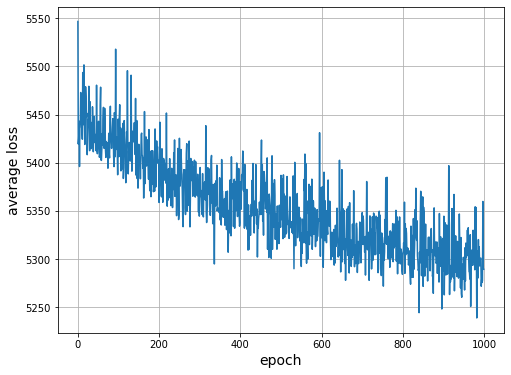

In [65]:
plt.figure(num=None, figsize=(8, 6))
plt.plot(losses)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch', fontsize=14)
plt.ylabel('average loss', fontsize=14)
plt.show()

##**Saving and Loading the Model**

In [66]:
# Specify a path
PATH = "houserend_model.pt"

# Save
torch.save(model, PATH)

# Load
model = torch.load(PATH)
model.eval()

LinearRegression(
  (dense_1): Linear(in_features=71, out_features=1, bias=True)
)

##**Testing Our Model on the Test Dataset**

In [67]:
# Converting the pandas dataframes into PyTorch Tensors
# From here onwards our features are inputs and labels are targets

inputs_test = torch.tensor(X_test.values).float()
targets_test = torch.tensor(y_test).float()
print(inputs_test)
print(targets_test)

tensor([[1300.,    3.,    3.,  ...,    0.,    0.,    0.],
        [ 700.,    2.,    2.,  ...,    0.,    0.,    0.],
        [ 600.,    2.,    2.,  ...,    0.,    0.,    0.],
        ...,
        [ 720.,    2.,    2.,  ...,    0.,    0.,    0.],
        [1000.,    3.,    2.,  ...,    0.,    0.,    0.],
        [1600.,    3.,    3.,  ...,    0.,    0.,    0.]])
tensor([[18000.],
        [11000.],
        [11000.],
        ...,
        [12500.],
        [15000.],
        [30000.]])


In [68]:
# Define Dataset
test_ds = TensorDataset(inputs_test, targets_test)
test_ds[0:3]

(tensor([[1.3000e+03, 3.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [7.0000e+02, 2.000

In [69]:
# Define the Dataloader
test_dl = DataLoader(test_ds, batch_size, shuffle = True)

In [70]:
len(test_ds)

5760

In [71]:
num_epochs = 1000
num_examples = 5750
dl = test_dl

In [72]:
# Calling the Training function of our dataset
fit(num_epochs, model, loss_fn, opt, dl)

Epoch 100, loss: 307.8693161090353
Epoch 200, loss: 307.869317743716
Epoch 300, loss: 307.8693181470788
Epoch 400, loss: 307.8693188901155
Epoch 500, loss: 307.8693191661005
Epoch 600, loss: 307.86931519616166
Epoch 700, loss: 307.86931787109376
Epoch 800, loss: 307.86931710682745
Epoch 900, loss: 307.86931808338994
Epoch 1000, loss: 307.8693179347826


##**Visualizing the Learning Curve**

### **Conclusion**
As observed, our loss slowly decreases as we increase the number of epochs. We can use this model to predict the house rent in Dhaka city based on different features, such as the location of the house, the area of the house, the number of beds, the number of baths, etc. The biggest challenge of this project was to prepare the dataset for building a model. There are other scope of improvements, such as trying different model architecture, experimenting with different hyperparameters, training the model for longer, collecting more data and so on. Overall, the result showed satisfactory result on the test dataset.